In [9]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
from random import shuffle
import matplotlib.pyplot as plt

DIR = './train'

naming_dict = {} # id: breed
f = open("Train.csv", "r")
fileContents = f.read()
fileContents = fileContents.split('\n')
for i in range(len(fileContents)-1):  # i should begin from 1
  fileContents[i+1] = fileContents[i+1].split(',')
  naming_dict[fileContents[i+1][0]] = fileContents[i+1][1]

In [10]:
def label_img(name):
  word_label = naming_dict[name]
  word_label = int(word_label)
  my_arr = np.zeros(16)
  my_arr[word_label-1] = 1
  return my_arr

In [11]:
print(DIR)

./train


In [12]:
def get_size_statistics(DIR):
  heights = []
  widths = []
  for img in os.listdir(DIR): #This method returns a list containing the names of the entries in the directory given by path.
    path = os.path.join(DIR, img)
    data = np.array(Image.open(path)) #PIL Image library
    heights.append(data.shape[0])
    widths.append(data.shape[1])
  avg_height = sum(heights) / len(heights)
  avg_width = sum(widths) / len(widths)  
  print("Average Height: " + str(avg_height))
  print("Max Height: " + str(max(heights)))
  print("Min Height: " + str(min(heights)))
  print('\n')
  print("Average Width: " + str(avg_width))
  print("Max Width: " + str(max(widths)))
  print("Min Width: " + str(min(widths)))
    

In [13]:
get_size_statistics(DIR)

Average Height: 200.0
Max Height: 200
Min Height: 200


Average Width: 200.0
Max Width: 200
Min Width: 200


In [14]:
IMG_SIZE = 200

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


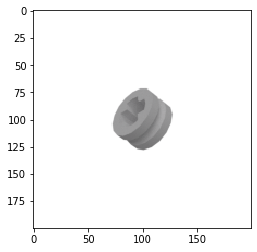

In [15]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')
print(train_data[43][1])

In [16]:
import numpy as np
trainImages = np.array([i[0] for i in train_data])
trainLabels = np.array([i[1] for i in train_data])


In [6]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [2]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


NameError: name 'model' is not defined

In [3]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

NameError: name 'model' is not defined

In [4]:
# Test on Test Set
TEST_DIR = './test'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        img = Image.open(path)
        test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')


NameError: name 'os' is not defined

In [5]:
testImages = np.array([i[0] for i in test_data])
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)



NameError: name 'np' is not defined